In [1]:
import nltk
import tweepy 
import matplotlib.pyplot as plt
import re, string, random #regex
from textblob import TextBlob
from tweepy import OAuthHandler 
from textblob import TextBlob 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import twitter_samples, stopwords #dataset library
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import FreqDist, classify, NaiveBayesClassifier


In [2]:
class TwitterClient(object): 
	''' 
	Generic Twitter Class for sentiment analysis. 
	'''
	def __init__(self): 
		''' 
		Class constructor or initialization method. 
		'''
		# keys and tokens from the Twitter Dev Console 
		consumer_key = 'KIUYLt7tRZXrgbTOL9eVKDG1y'
		consumer_secret = '1eboVPgKi07A7hcdF83zvChGfF2wPgi4FFQlxGrZGgF5NgorJN'
		access_token = '1234517457781448704-IfKUSJoXIHx0xIa2wH71spyIwQA7NP'
		access_token_secret = '1DPeWtLpyUfP4H016IwQ6NYi7ZSejObpBPu4YudnKy5sZ'
        
		# attempt authentication 
		try: 
			# create OAuthHandler object 
			self.auth = OAuthHandler(consumer_key, consumer_secret) 
			# set access token and secret 
			self.auth.set_access_token(access_token, access_token_secret) 
			# create tweepy API object to fetch tweets 
			self.api = tweepy.API(self.auth) 
		except: 
			print("Error: Authentication Failed") 

	def clean_tweet(self, tweet): 
		''' 
		Utility function to clean tweet text by removing links, special characters 
		using simple regex statements. 
		'''
		return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()) 

	def get_tweet_sentiment(self, tweet): 
		''' 
		Utility function to classify sentiment of passed tweet 
		using textblob's sentiment method 
		'''      
		# create TextBlob object of passed tweet text 
		analysis = TextBlob(self.clean_tweet(tweet)) 
		# set sentiment 
		if analysis.sentiment.polarity > 0:
			return 'positive'            
		elif analysis.sentiment.polarity == 0: 
			return 'neutral'
		else: 
			return 'negative'
 
	def get_tweets(self, query, count = 10): 
		''' 
		Main function to fetch tweets and parse them. 
		'''
		# empty list to store parsed tweets 
		tweets = [] 

		try: 
			# call twitter api to fetch tweets 
			fetched_tweets = self.api.search(q = query, count = count) 

			# parsing tweets one by one 
			for tweet in fetched_tweets: 
				# empty dictionary to store required params of a tweet 
				parsed_tweet = {} 

				# saving text of tweet 
				parsed_tweet['text'] = tweet.text 
				# saving sentiment of tweet 
				parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 

				# appending parsed tweet to tweets list 
				if tweet.retweet_count > 0: 
					# if tweet has retweets, ensure that it is appended only once 
					if parsed_tweet not in tweets: 
						tweets.append(parsed_tweet) 
				else: 
					tweets.append(parsed_tweet) 

			# return parsed tweets 
			return tweets 

		except tweepy.TweepError as e: 
			# print error (if any) 
			print("Error : " + str(e)) 


In [3]:
def calculatePercentage(a,b):
    return 100*float(a)/float(b)


In [4]:
def main(): 
	# creating object of TwitterClient Class 
	api = TwitterClient() 
	# calling function to get tweets 
	tweets = api.get_tweets(query = input("Enter What You Want TO Search:\t"), count = int(input("Enter The No of Tweets\t"))) 
	#tweets = tweepy.Cursor(api.search, q=query, lang='en').items(tweets)

       
	positive = 0
	negative = 0
	neutral = 0
	polarity = 0
	neg_count = 0
	neg_correct = 0

    
    
    

	# picking positive tweets from tweets 
	ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
	positive=calculatePercentage(len(ptweets),len(tweets))
	# percentage of positive tweets 
	print("Positive tweets|Count: {} || percentage: {} %".format(len(ptweets),100*len(ptweets)/len(tweets))) 
    
    
	# percentage of neutral tweets 
	neutweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral']
	neutral=calculatePercentage(len(neutweets),len(tweets))
	print("Neutral tweets |Count: {} || percentage: {} % ".format(len(neutweets),100*len(neutweets)/len(tweets))) 
    
    
	# picking negative tweets from tweets 
	ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
	negative=calculatePercentage(len(ntweets),len(tweets))
	# percentage of negative tweets 
	print("Negative tweets|Count: {} || percentage: {} %".format(len(ntweets),100*len(ntweets)/len(tweets))) 

	print("\n\n=================All Tweets=======================")
	for tweet in tweets[:1000]: 
		print(tweet['text']) 
	print("===================================================")
    
    
	# printing positive tweets 
	print("\n\n\n===============Positive tweets:==================") 
	for tweet in ptweets[:1000]: 
		print(tweet['text']) 
	print("===================================================")
    

	# printing negative tweets 
	print("\n\n\n===============Negative tweets:==================") 
	for tweet in ntweets[:1000]: 
		print(tweet['text'])
	print("===================================================")
    
        
	# printing neutral tweets 
	print("\n\n\n================Neutral tweets:===================") 
	for tweet in neutweets[:1000]: 
		print(tweet['text']) 
	print("===================================================")
        

        

	positive=float(format(positive,'.2f'))
	negative=float(format(negative,'.2f'))
	neutral=float(format(neutral,'.2f'))

	print("====================@PIE CHART=====================")
        
	labels = ['Positive ['+str(positive)+'%]', 'Neutral ['+str(neutral)+'%]', 'Negative ['+str(negative)+'%]']
	sizes=[positive,neutral,negative]
	max1 = max(sizes)
	if(max1==positive):
		print("The Opinion of the pepople after analysing the tweets is ::positive")
	elif(max1==neutral):
		print("The Opinion of the pepople after analysing the tweets is ::neutral")
	elif(max1==negative):
		print("The Opinion of the pepople after analysing the tweets is ::negative")
	colors=['green','yellow','red']
	patches,texts=plt.pie(sizes,colors=colors,startangle=90)
	plt.legend(patches,labels,loc="best")
	#plt.title('How people are reacting on the topic by analyzing the above Tweets'+ str(tweet[''])+'.')
	plt.axis('equal')
	plt.tight_layout()
	plt.show()  



Enter What You Want TO Search:	ipl
Enter The No of Tweets	5
Positive tweets|Count: 3 || percentage: 60.0 %
Neutral tweets |Count: 1 || percentage: 20.0 % 
Negative tweets|Count: 1 || percentage: 20.0 %


=================All Tweets=======================
I m big fan of @IPL but in current scenario of #coronavirus it would be better to postpone this as if it happens In… https://t.co/eZbcpDY92q
RT @StocksResearch: Maha Govt to push for cancellation of IPL on grounds of Coronavirus fears.

Jubilant Food - 1647 - Look for negative im…
RT @ThangamV18: Chennai IPL பழய ட்வீட்ஸ தோண்டி எடுத்து புரட்சி பன்ன பம்பாய் இந்தியன்ஸ் கவனத்திற்கு😂

இங்கயாச்சும் சோசியல் மீடியா டீம் அட்மி…
Cricket ― Will Gayle, Bravo be fit and ready for T20 World Cup? IPL will play 'huge' role, says Brian Lara… https://t.co/VSJGOIkU7k
@Pradhaan_Mantri Bhai sb kuch fixed h aajkal
Ipl Dekho 😭



===============Positive tweets:==================
I m big fan of @IPL but in current scenario of #coronavirus it would be better t

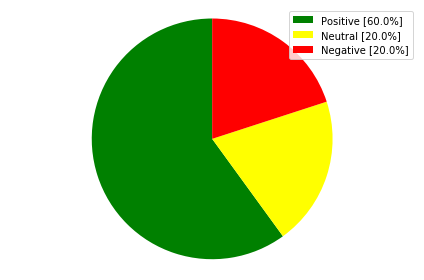

In [5]:
if __name__ == "__main__":
	main() 